## Introduction
Isolation Forest is a machine learning algorithm that detects anomalies 
by partitioning data recursively using random splits. Similar to Random Forests, it is based on decision trees. 
Since there are no pre-defined labels it is an unsupervised model.

Anomalies have low isolation scores, useful for rare and unusual event detection in large datasets.

Randomly sub-sampled data is processed in a tree structure based on randomly selected features. The samples that travel deeper into the tree are less likely to be anomalies as they required more cuts to isolate them. Similarly, the samples which end up in shorter branches indicate anomalies as it was easier for the tree to separate them from other observations.

### Importing libraries and data

In [3]:
%%time
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import IsolationForest

import seaborn as sns
import warnings

import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

CPU times: user 131 µs, sys: 20 µs, total: 151 µs
Wall time: 164 µs


In [4]:
%%time
data = pd.read_csv('marks.csv')
data.head(10)

CPU times: user 6.57 ms, sys: 0 ns, total: 6.57 ms
Wall time: 5.8 ms


,student id,marks
0,1,95
1,2,98
2,3,92
3,4,10000
4,5,91
5,6,89
6,7,90
7,8,2000
8,9,100
9,10,100


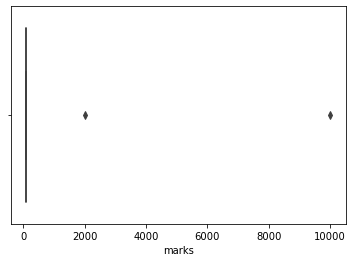

CPU times: user 316 ms, sys: 26 ms, total: 342 ms
Wall time: 907 ms


In [5]:
%%time
sns.boxplot(data.marks)
plt.show()

### Defining and fitting the model

In [8]:
%%time

random_state = np.random.RandomState(42)

model=IsolationForest(n_estimators=100,max_samples='auto',contamination=float(0.2),random_state=random_state)

#contamination: percentage of anomalies present in the data. Parameter provided by user.

model.fit(data[['marks']])

print(f'Random state: {random_state} type: {type(random_state)}')

print(model.get_params())

print(type(model))

Random state: RandomState(MT19937) type: <class 'numpy.random.mtrand.RandomState'>
{'bootstrap': False, 'contamination': 0.2, 'max_features': 1.0, 'max_samples': 'auto', 'n_estimators': 100, 'n_jobs': None, 'random_state': RandomState(MT19937) at 0x7F305F4C3050, 'verbose': 0, 'warm_start': False}
<class 'sklearn.ensemble._iforest.IsolationForest'>
CPU times: user 408 ms, sys: 0 ns, total: 408 ms
Wall time: 408 ms


### Scoring the data to obtain anomaly scores

In [9]:
%%time

data['scores'] = model.decision_function(data[['marks']])

data['anomaly_score'] = model.predict(data[['marks']])

data[data['anomaly_score']==-1].head()

CPU times: user 207 ms, sys: 0 ns, total: 207 ms
Wall time: 202 ms


,student id,marks,scores,anomaly_score
3,4,10000,-0.318638,-1
7,8,2000,-0.211458,-1


In [10]:
data.head(20) #  both the anomalies are assigned an anomaly score of -1

,student id,marks,scores,anomaly_score
0,1,95,0.066074,1
1,2,98,0.052864,1
2,3,92,0.098415,1
3,4,10000,-0.318638,-1
4,5,91,0.106519,1
5,6,89,0.054518,1
6,7,90,0.098212,1
7,8,2000,-0.211458,-1
8,9,100,0.069109,1
9,10,100,0.069109,1


### Model Evaluation

In [13]:
%%time
anomaly_count = len(data[data['anomaly_score']==-1])
accuracy = 100*list(data['anomaly_score']).count(-1)/(anomaly_count)
print("Accuracy of the model:", accuracy, '. This is just a "toy" example')

Accuracy of the model: 100.0 . This is just a "toy" example
CPU times: user 0 ns, sys: 1.97 ms, total: 1.97 ms
Wall time: 1.78 ms
